# Binary Search

The binary search algorithm looks for a number x in a sorted list by splitting the list into halves and keeping the half containing x. This process is repeated recursively until finding x or the closest element in the list. 
An algorithm's time complexity is often estimated in the worst case senario. For binary search, the worse case is given by the maximum number of steps needed to find an arbitrary number x in a sorted list of size N. 
At each step the size of the input is divided by two. Therefore, the number of steps is equal to the number of times we can split N by two.

**1. How many steps does it take to find x in an array with 4, 8, 16, 32 elements?**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 

In [18]:
# calculate steps to split data in binary search and return a data frame 
def calc_steps_binary_search(*array_sizes):
    df = []
    for size in array_sizes:
        steps = 0
        el = size
        while (el > 1): 
            steps += 1
            el /= 2
        df.append([size, steps])
    return pd.DataFrame(df, columns = ['size', 'steps'])

array_sizes = [2, 4, 8, 16, 32, 64]
binary_search_df = calc_steps_binary_search(*array_sizes)
binary_search_df

,size,steps
0,2,1
1,4,2
2,8,3
3,16,4
4,32,5
5,64,6


**2. Plot input size vs. step**

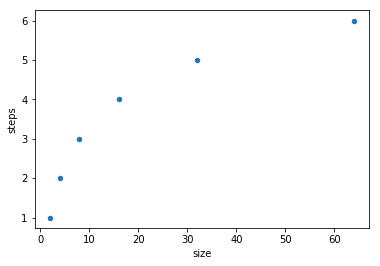

In [19]:
binary_search_df.plot(x='size', y='steps', kind='scatter')
plt.show()


**3. Do you see any pattern? If so, what kind of pattern do you see?**  
Looks like a logarithmic function.